In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import os

In [5]:
from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir

font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [6]:
# import results
syn_hh = pd.read_csv(os.path.join(output_dir, geo_lev,"syn_hh_final.csv"))
syn_pp = pd.read_csv(os.path.join(output_dir, geo_lev,"syn_pp_final.csv"))

In [7]:
# import samples original
samples_ori_hh = pd.read_csv(os.path.join(processed_data, "ori_sample_hh.csv"))
samples_ori_pp = pd.read_csv(os.path.join(processed_data, "ori_sample_pp.csv"))

In [15]:
samples_ori_pp

,persid,hhid,age,sex,relationship,persinc,nolicence,anywork,_weight
0,Y12H0000101P01,Y12H0000101,50-59,M,Main,$1000-1249 p.w.,Some Licence,Y,79.54
1,Y12H0000101P02,Y12H0000101,40-49,F,Spouse,$1-199 p.w.,Some Licence,N,87.92
2,Y12H0000101P03,Y12H0000101,10-19,F,Child,Zero Income,No Licence,N,96.71
3,Y12H0000101P04,Y12H0000101,0-9,F,Child,Zero Income,No Licence,N,95.17
4,Y12H0000102P01,Y12H0000102,50-59,F,Main,$1-199 p.w.,Some Licence,N,75.07
...,...,...,...,...,...,...,...,...,...
78973,Y20H4001028P02,Y20H4001028,60-69,F,Spouse,$400-599 p.w.,Some Licence,Y,640.25
78974,Y20H4001029P01,Y20H4001029,70-79,M,Main,$300-399 p.w.,Some Licence,N,346.67
78975,Y20H4001029P02,Y20H4001029,70-79,F,Spouse,$300-399 p.w.,Some Licence,N,334.55
78976,Y20H4001036P01,Y20H4001036,70-79,F,Main,$400-599 p.w.,Some Licence,N,334.55


In [10]:
# import the del data
del_df = []
for file in glob(os.path.join(processed_data, "del*")):
    df = pd.read_csv(file)
    del_df.append(df)
del_df = pd.concat(del_df)
del_df

,hhid,age,sex,persinc,nolicence,anywork,Spouse,Child,Grandchild,Others
0,2137,30-39,M,Negative Income,Some Licence,Y,0,3,0,0
1,6911,30-39,M,Negative Income,Some Licence,Y,1,1,0,0
2,26615,30-39,M,Negative Income,Some Licence,Y,1,1,0,0
3,34262,30-39,M,Negative Income,Some Licence,Y,1,2,0,0
4,37389,30-39,M,Negative Income,Some Licence,Y,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14050,275748,100+,M,$2000+ p.w.,No Licence,Y,1,0,0,0
14051,2120625,100+,M,$300-399 p.w.,Some Licence,Y,1,1,0,0
14052,1275415,100+,M,$400-599 p.w.,No Licence,Y,1,1,1,1
14053,841088,100+,F,$1000-1249 p.w.,No Licence,Y,1,1,2,0


In [68]:
dict_order_states = {
    "pp": {
        'age': ['0-9',
            '10-19',
            '20-29',
            '30-39',
            '40-49',
            '50-59',
            '60-69',
            '70-79',
            '80-89',
            '90-99',
            '100+'],
        'sex': ['M', 'F'],
        'persinc': ['Missing/Refused',
                'Negative Income'
                'Zero Income',
                '$1-199 p.w.',
                '$200-299 p.w.',
                '$300-399 p.w.',
                '$400-599 p.w.',
                '$600-799 p.w.',
                '$800-999 p.w.',
                '$1000-1249 p.w.',
                '$1250-1499 p.w.',
                '$1500-1999 p.w.',
                '$2000+ p.w.',
                ],
        'nolicence': ['Some Licence', 'No Licence'],
        'anywork': ['Y', 'N']
    },
    "hh": {
        'dwelltype': ['Separate House',
                    'Terrace/Townhouse',
                    'Flat or Apartment',
                    'Missing',
                    'Other',],
        'owndwell': ['Fully Owned',
                    'Being Purchased',
                    'Being Rented',
                    'Occupied Rent-Free',
                    'Something Else'],
        'hhinc': ['Nil income',
                  '1-149',
                  '150-299',
                  '300-399',
                  '400-499',
                  '500-649',
                  '650-799',
                  '800-999',
                '1000-1249',
                '1250-1499',
                '1500-1749',
                '1750-1999',
                '2000-2499',
                '2500-2999',
                '3000-3499',
                '3500-3999',
                '4000-4499',
                '4500-4999',
                '5000-5999',
                '6000-7999',
                '8000+'],
        'totalvehs': ['0', '1', '2', '3', '4+']
    }
}

In [81]:
def get_hm_pair(df, x_att, y_att, type="hh", name_title="Heatmap"):
    if "_weight" not in df.columns:
        df["_weight"] = 1
    # tot = df["_weight"].sum()
    df = df[[x_att, y_att, "_weight"]]
    gb_check = df.groupby([x_att, y_att])["_weight"].sum()

    x_states = dict_order_states[type][x_att]
    y_states = dict_order_states[type][y_att]
    y_states_new = y_states.copy()
    y_states_new.reverse()
    data_to_df = {state: [] for state in x_states}
    for x in x_states:
        for y in y_states_new:
            i_check = (x, y,)
            val = None
            if i_check in gb_check.index:
                val = gb_check[i_check]
            else:
                val = 0
            data_to_df[x].append(val)
    final_df = pd.DataFrame(data=data_to_df)
    final_df.index = y_states_new
    
    fig = plt.figure(figsize = (10, 5))
    sns.heatmap(final_df)
    plt.title(f"{name_title}: {x_att} vs. {y_att}")

    return final_df

In [82]:
from itertools import combinations

comb_list_hh = list(combinations(dict_order_states["hh"].keys(), 2))
comb_list_pp = list(combinations(dict_order_states["pp"].keys(), 2))

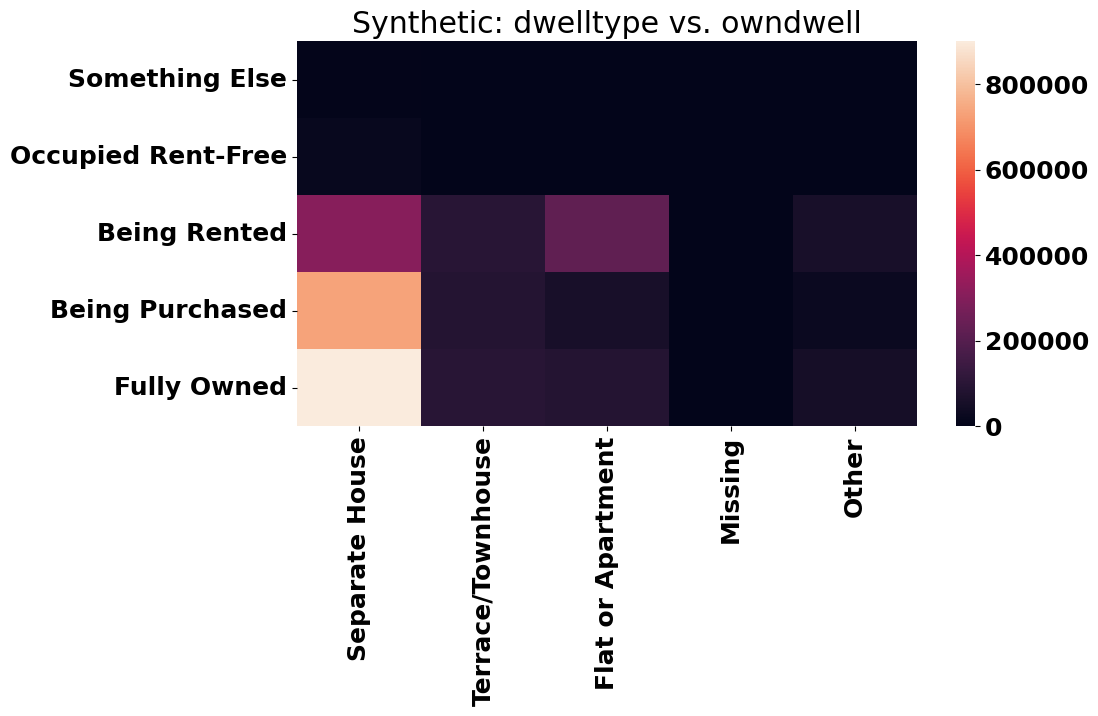

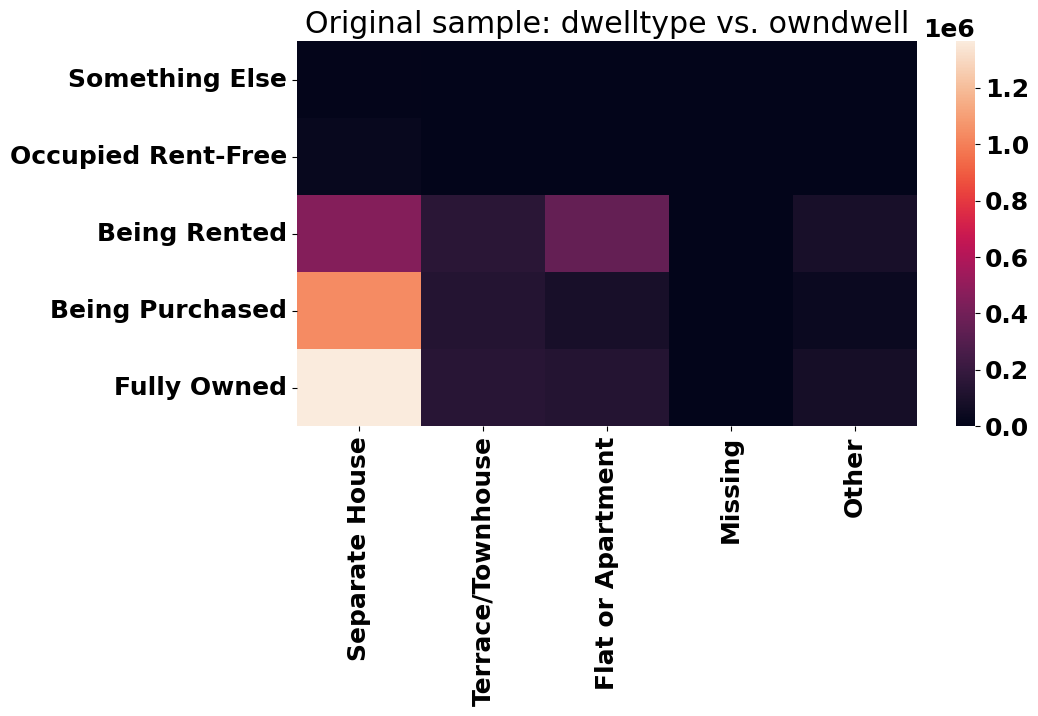

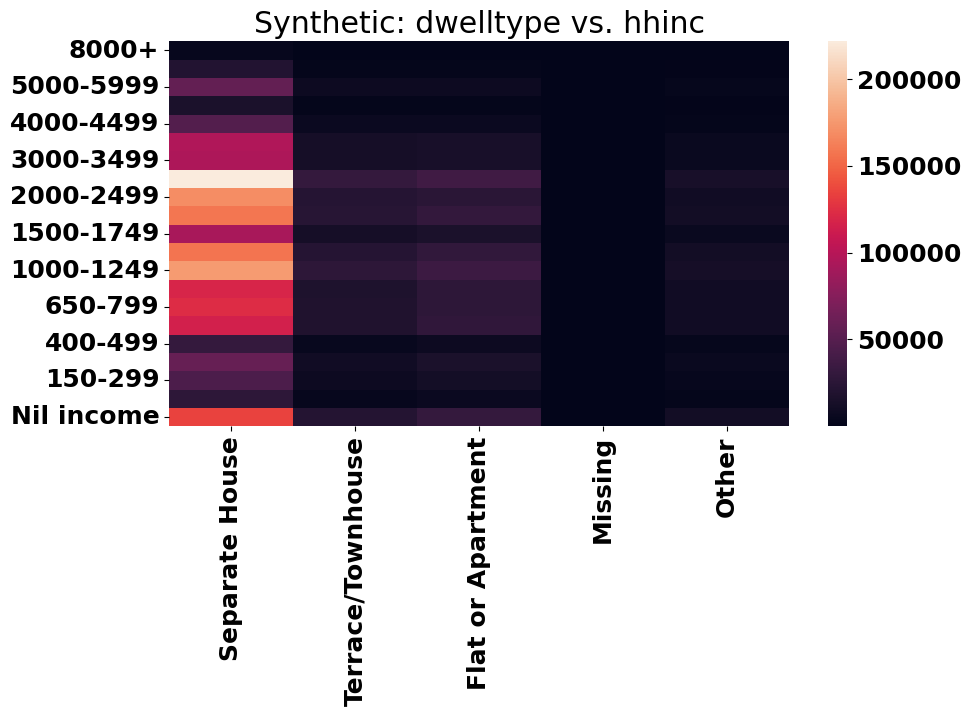

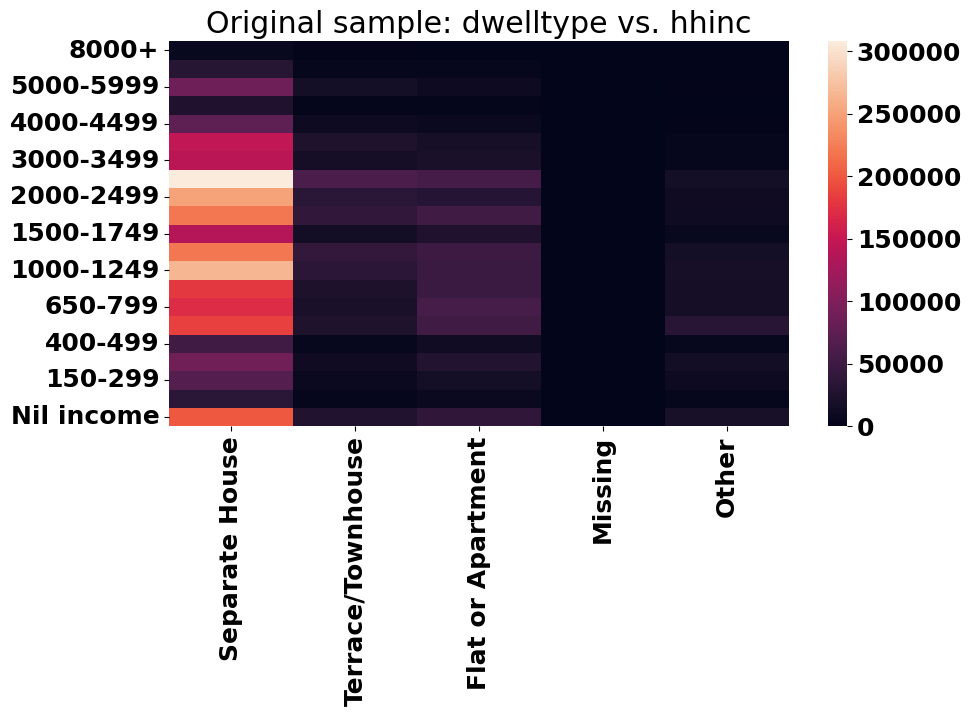

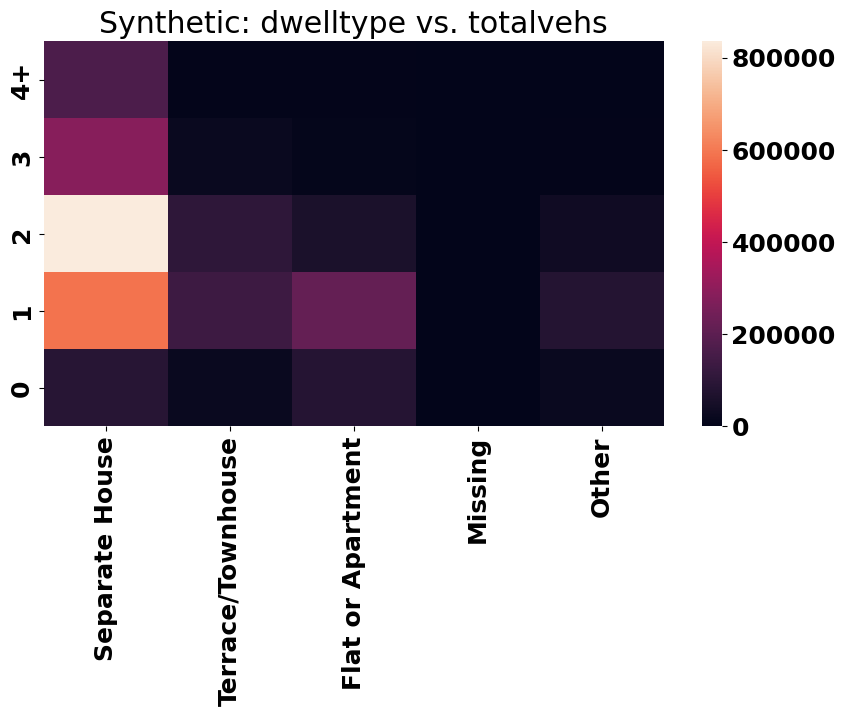

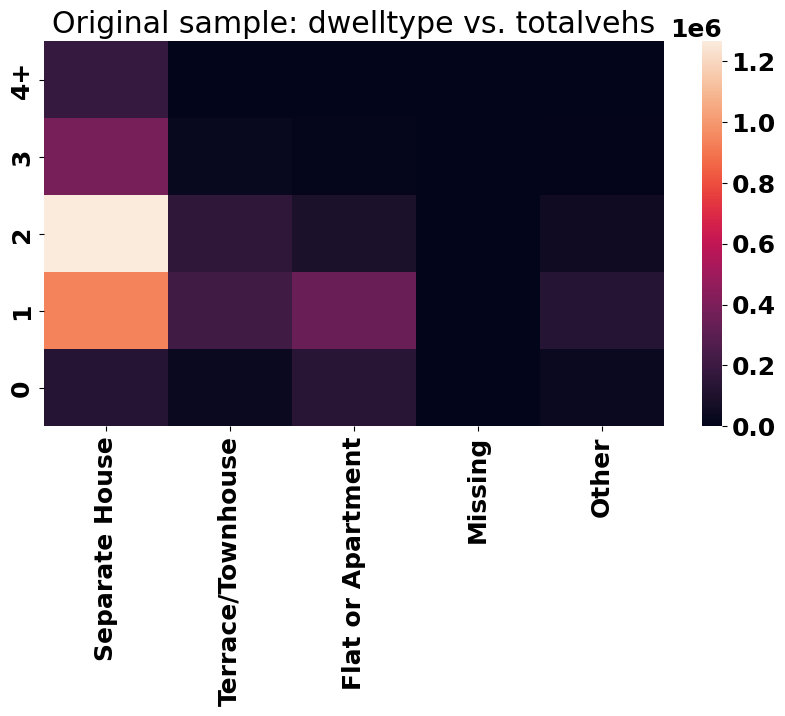

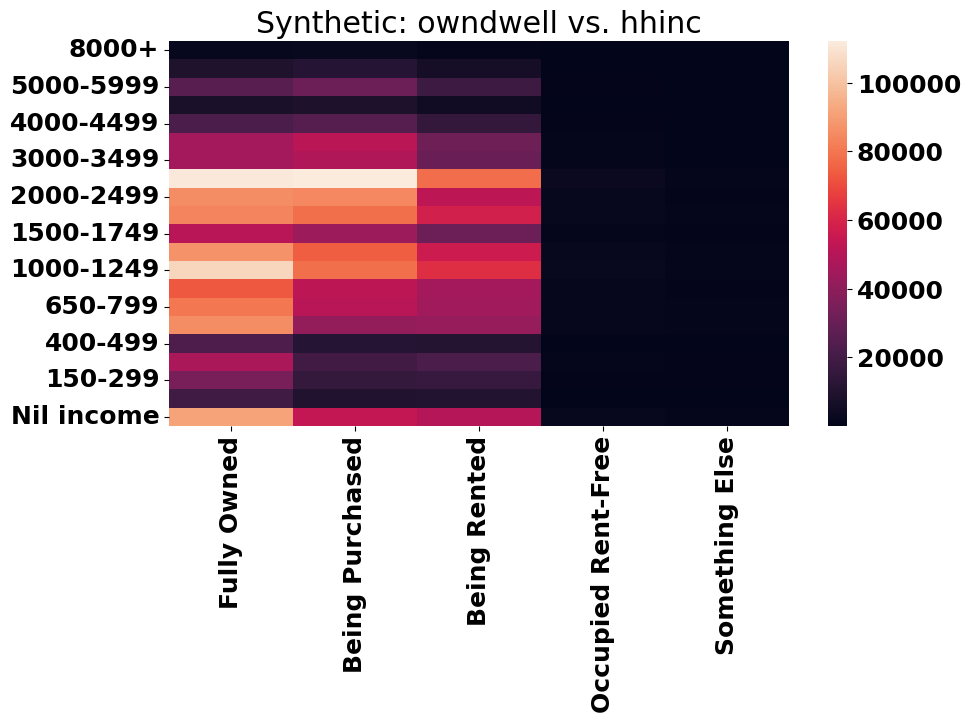

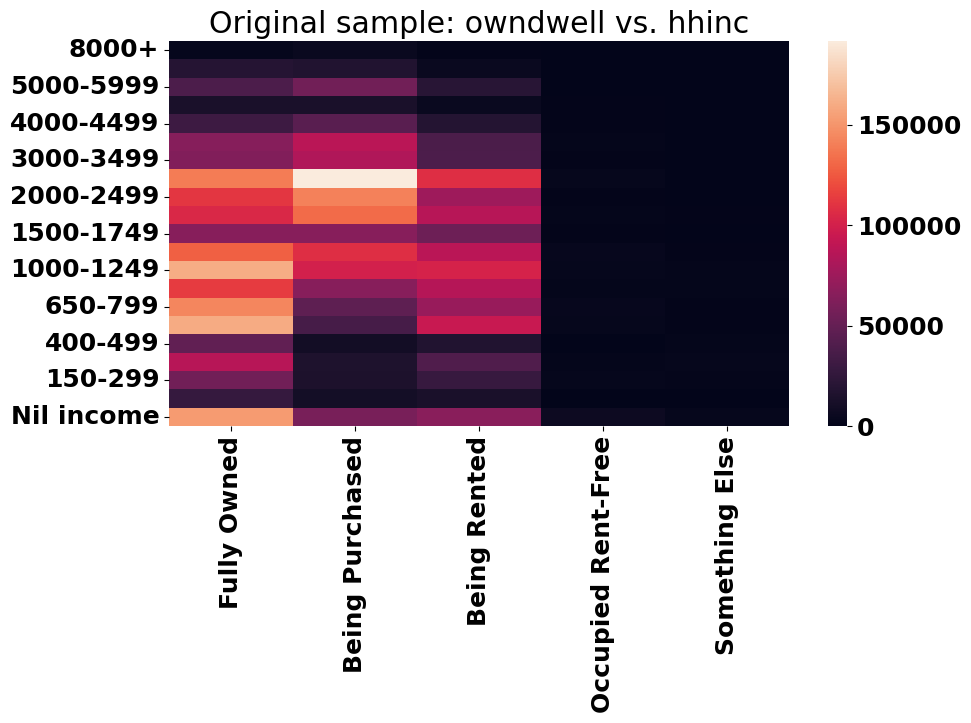

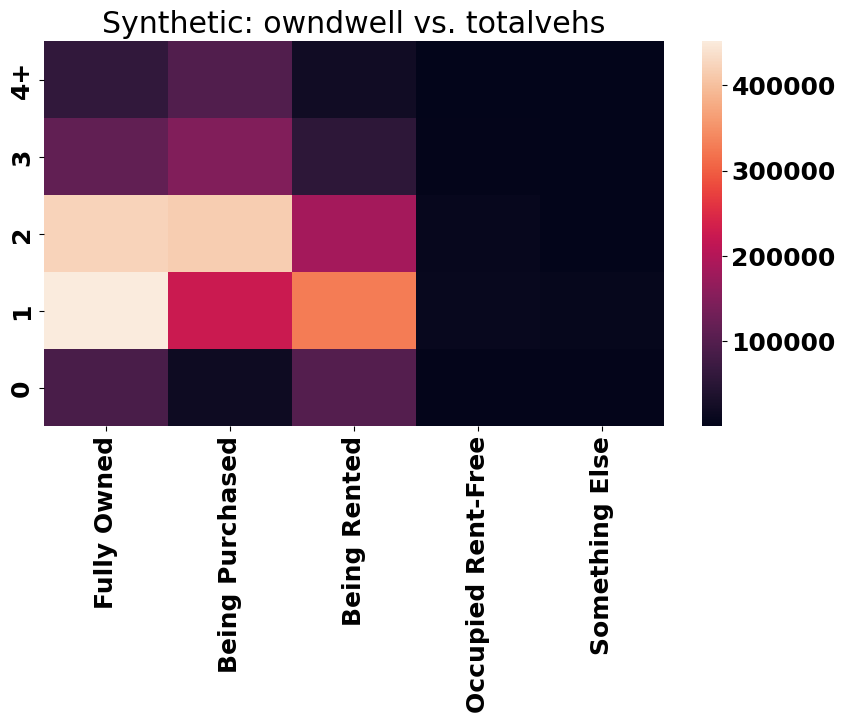

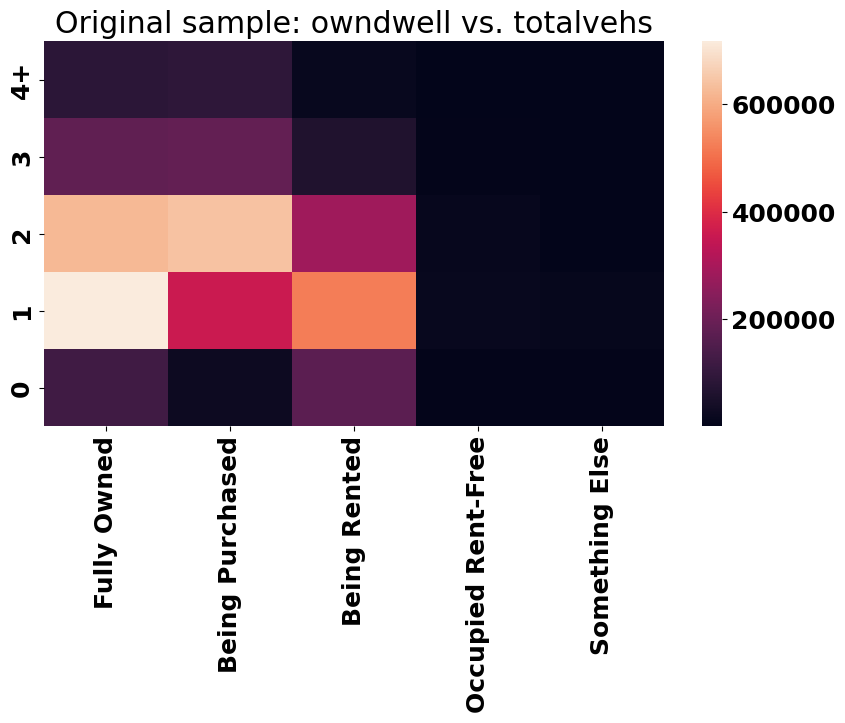

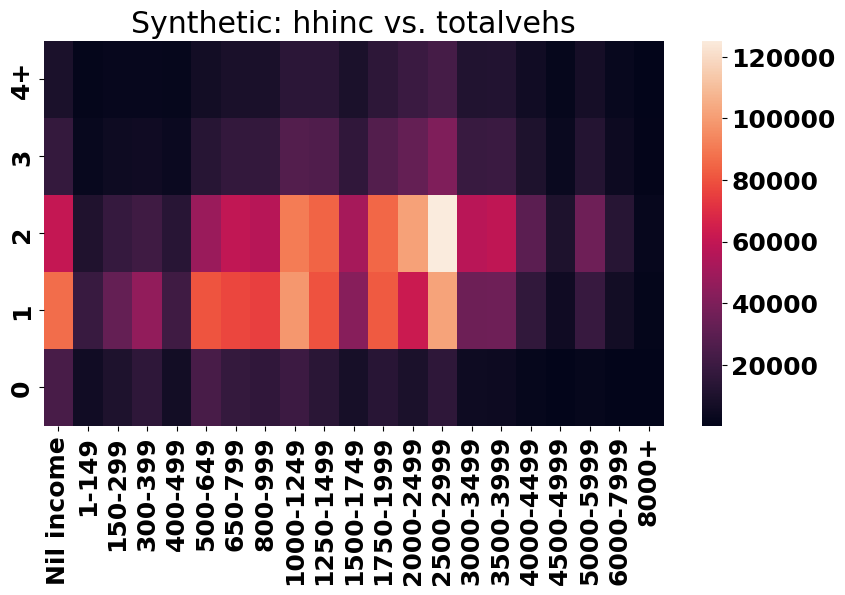

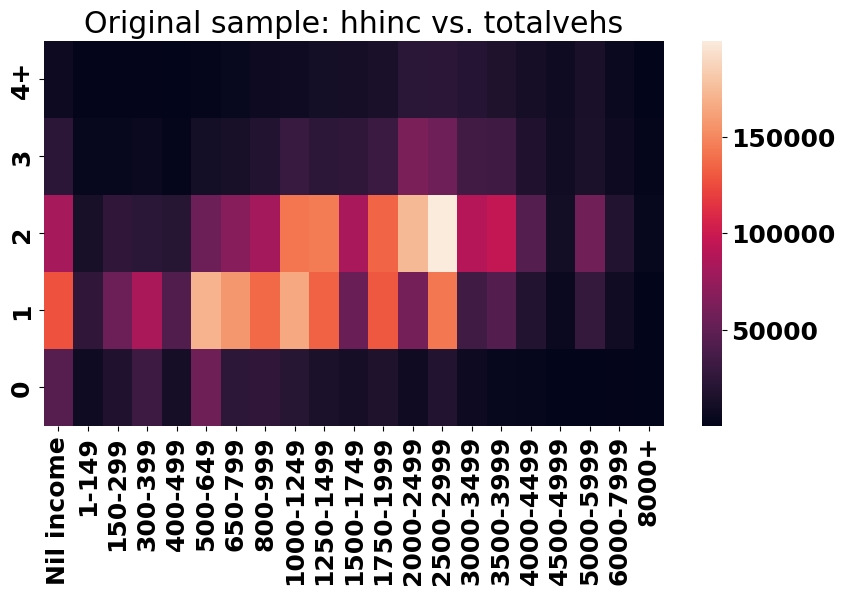

In [83]:
for comb in comb_list_hh:
    get_hm_pair(syn_hh, comb[0], comb[1], type="hh", name_title="Synthetic")
    get_hm_pair(samples_ori_hh, comb[0], comb[1], type="hh", name_title="Original sample")

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_17384\1448591513.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


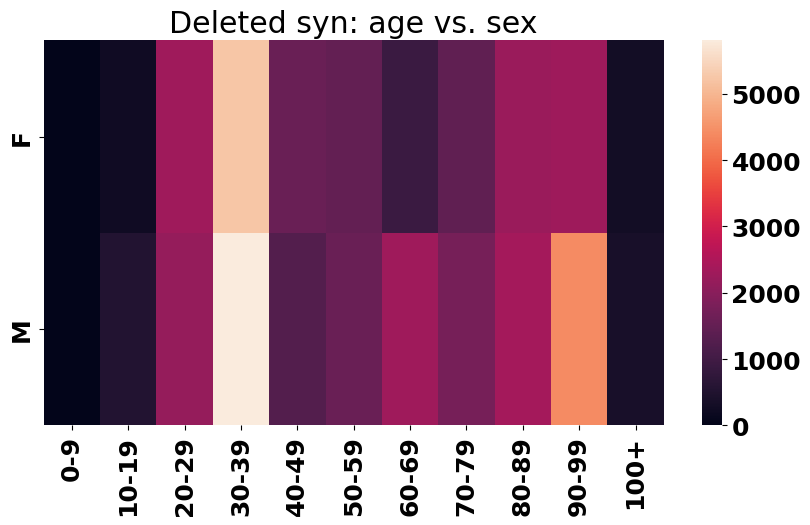

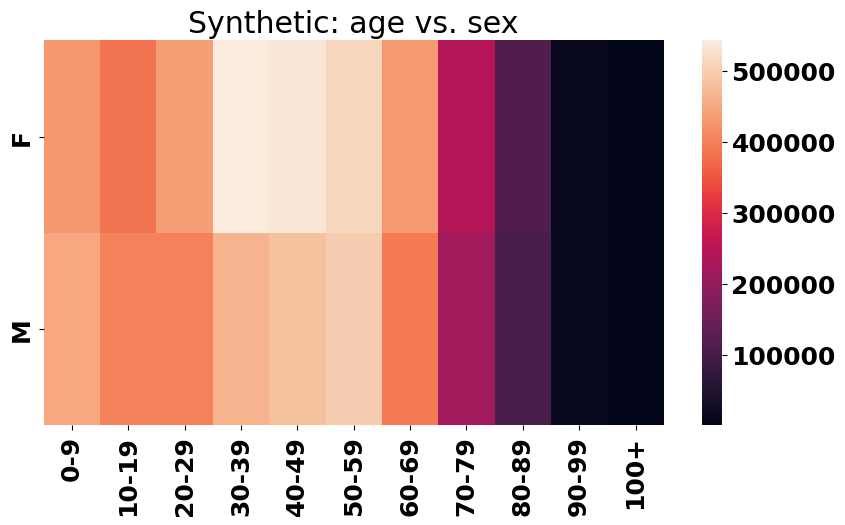

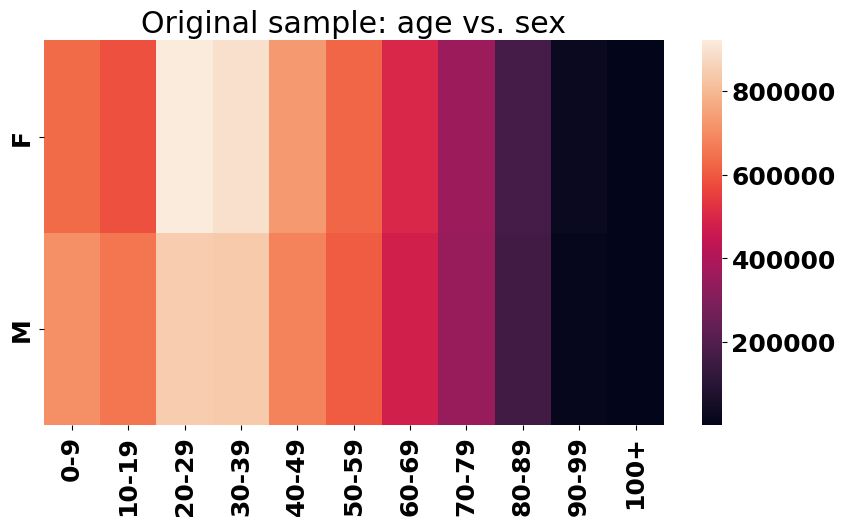

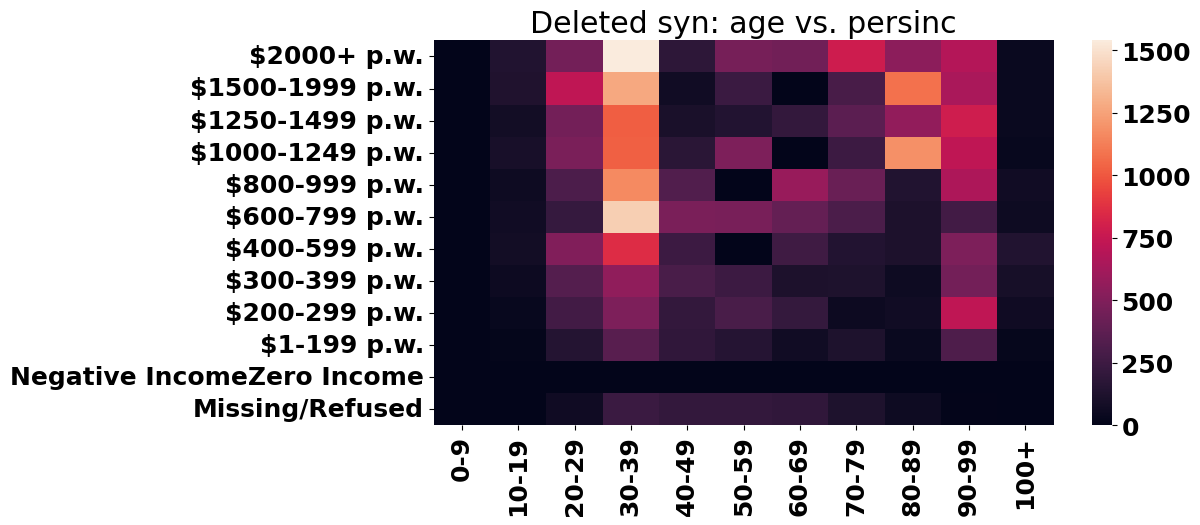

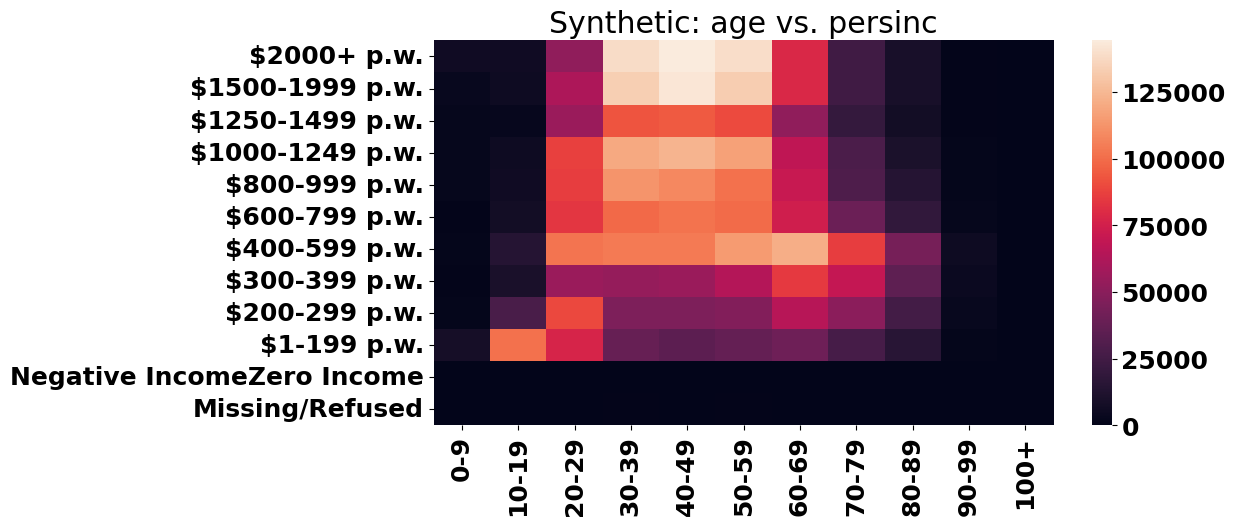

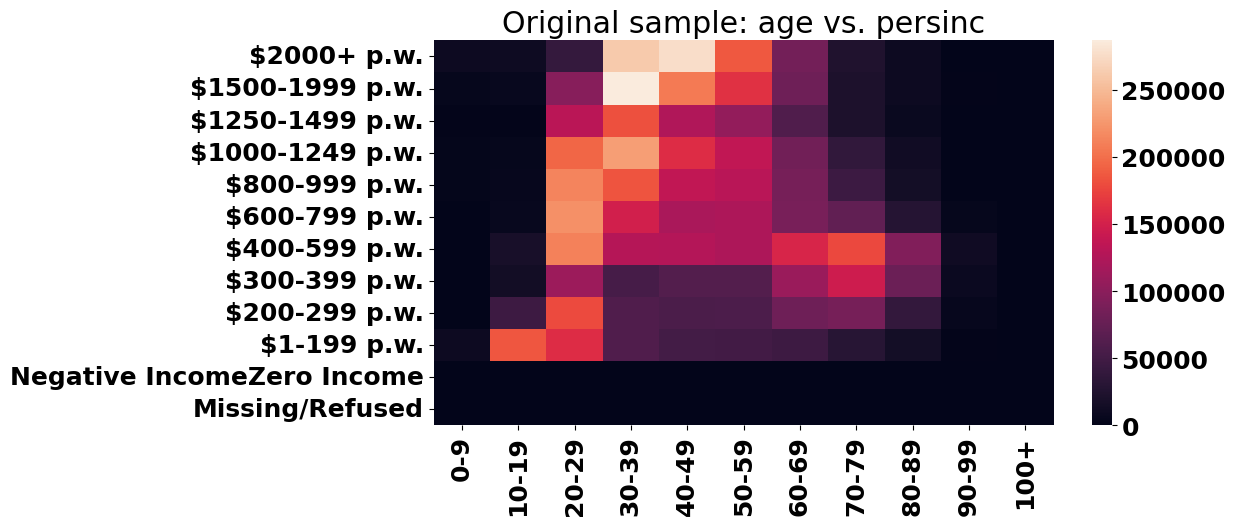

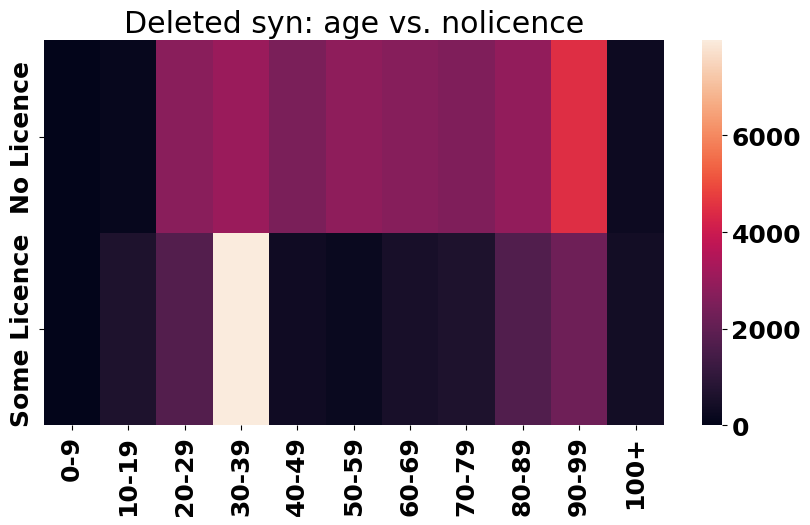

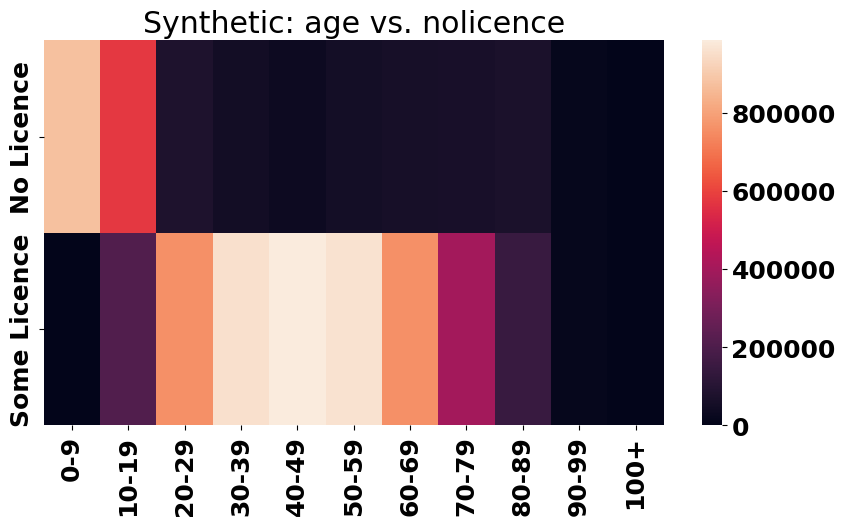

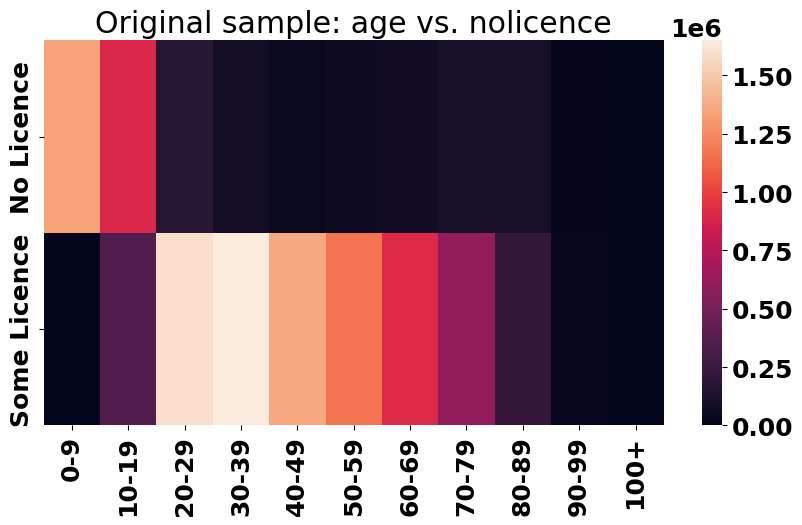

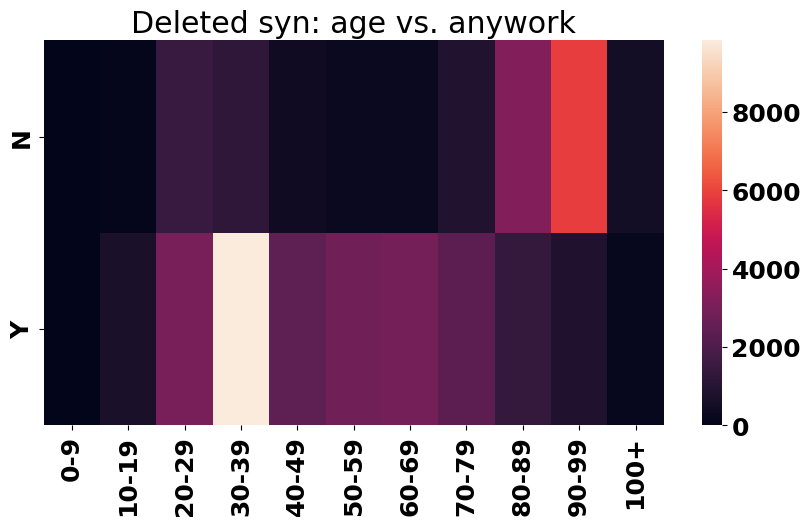

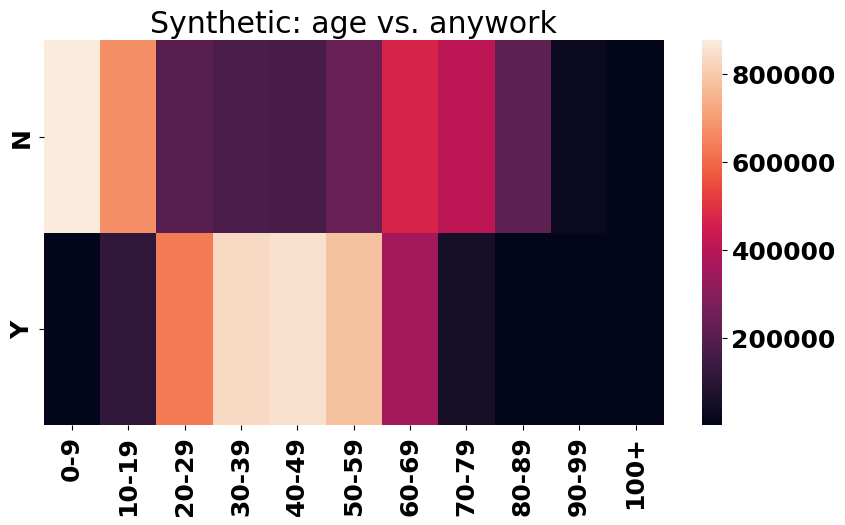

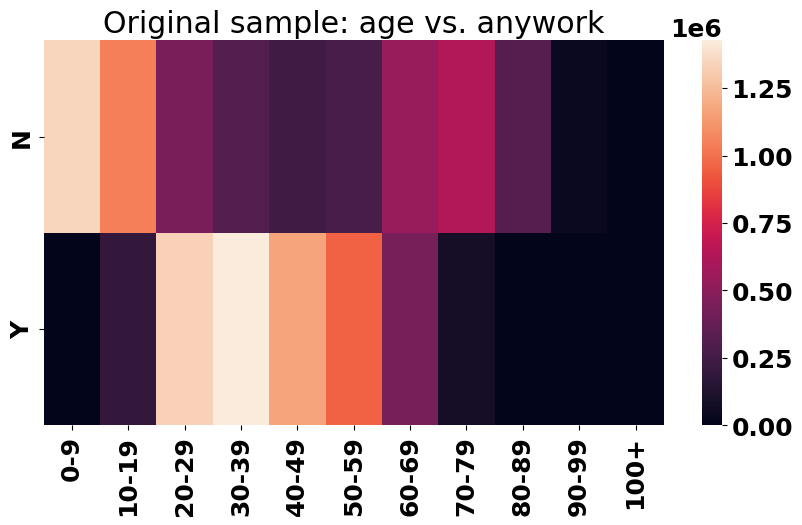

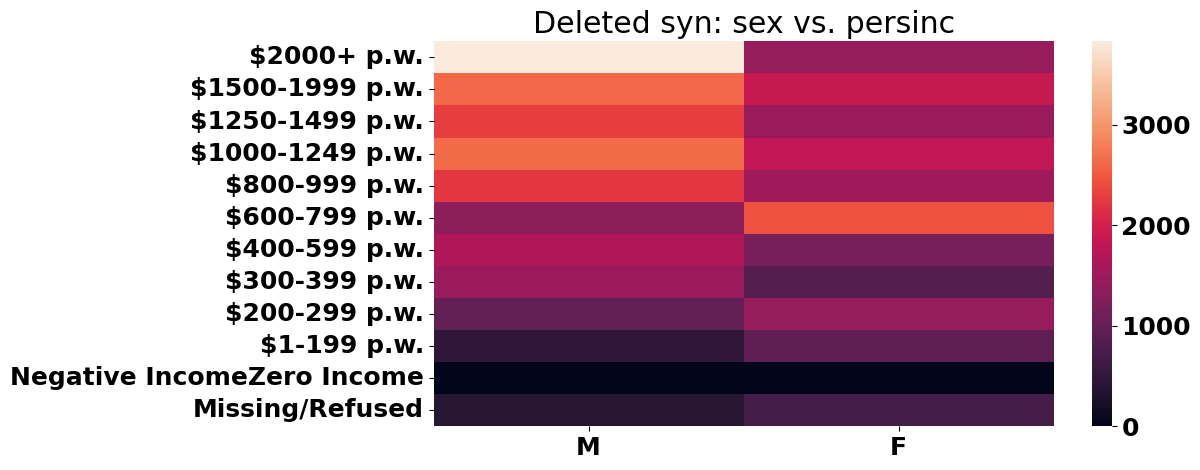

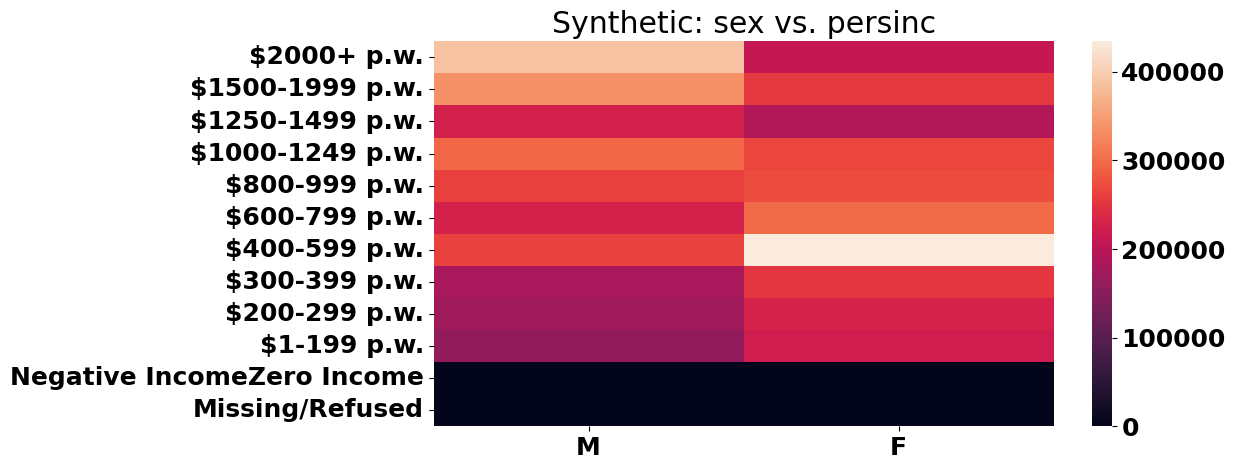

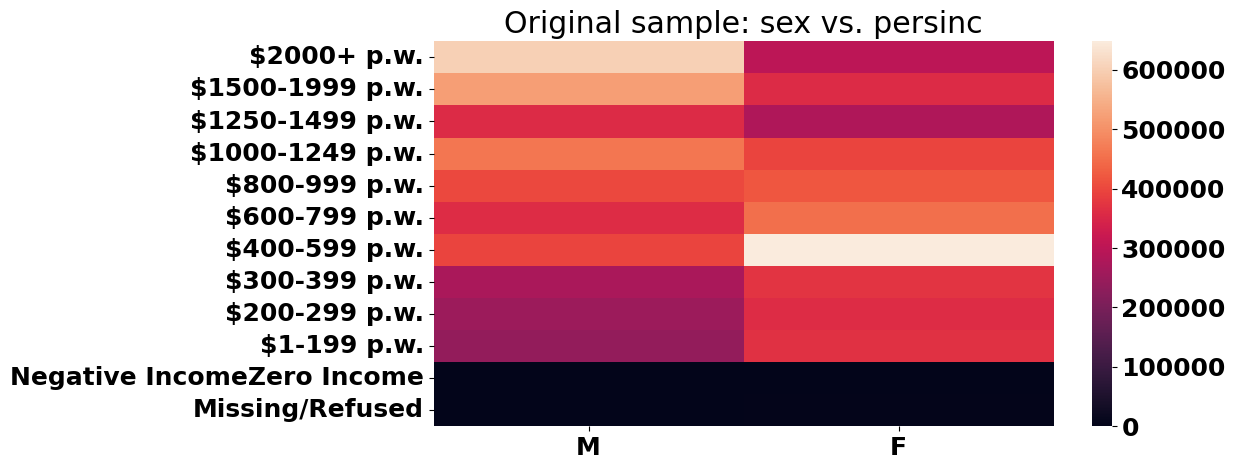

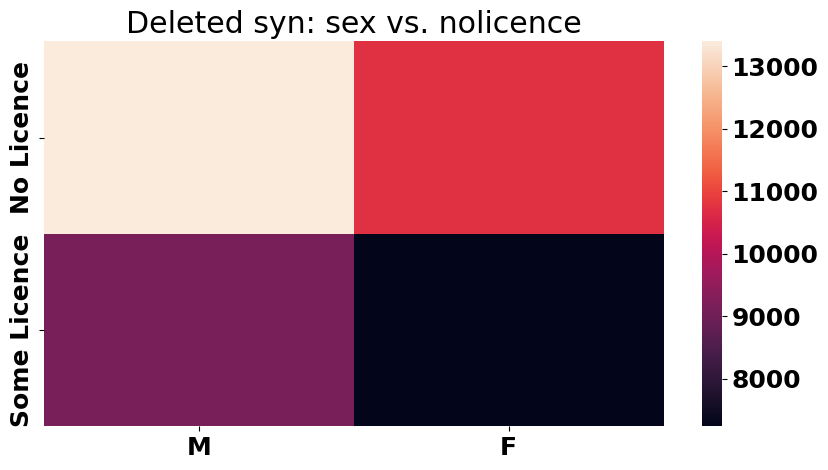

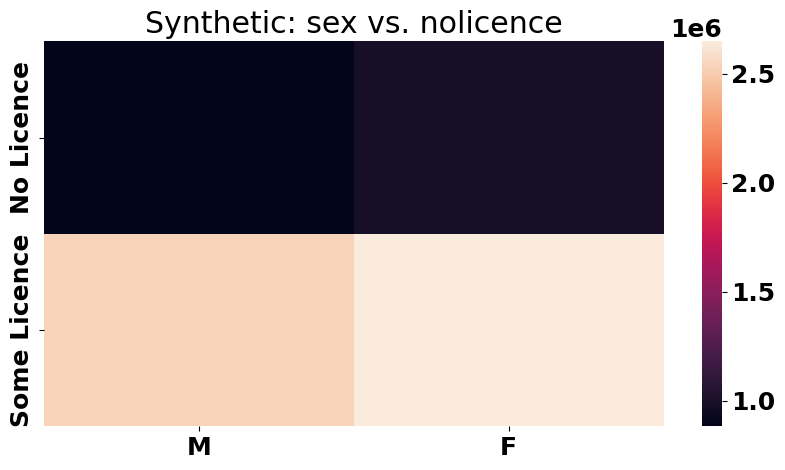

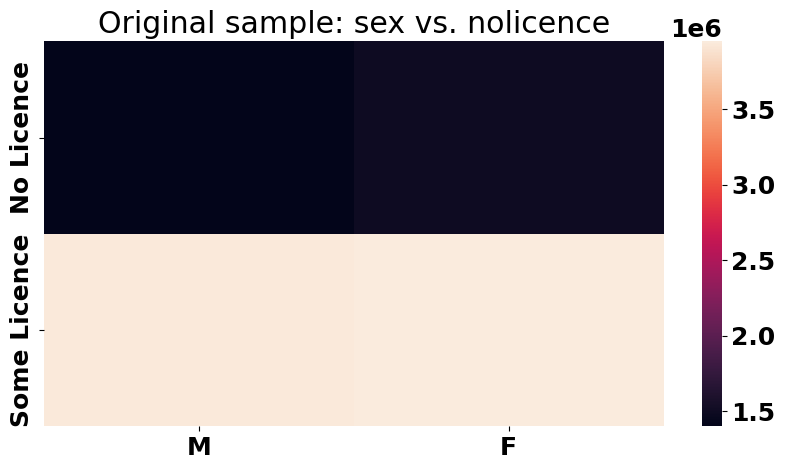

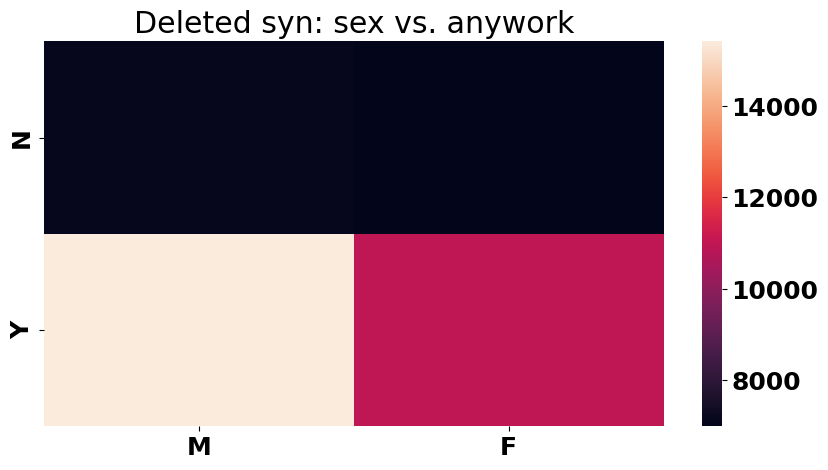

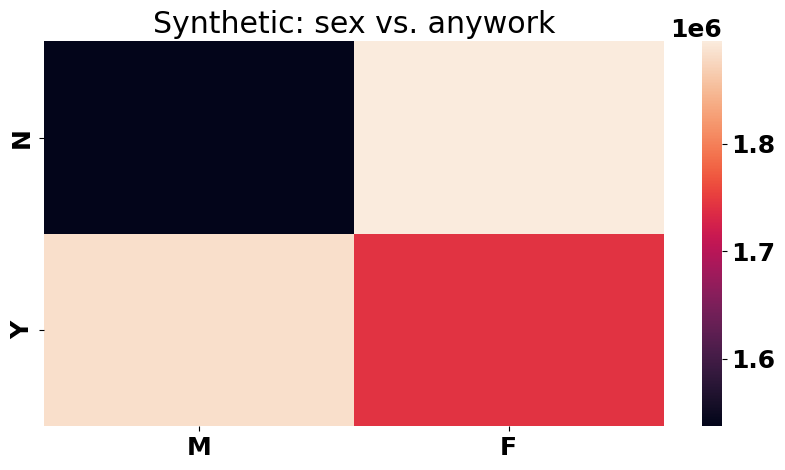

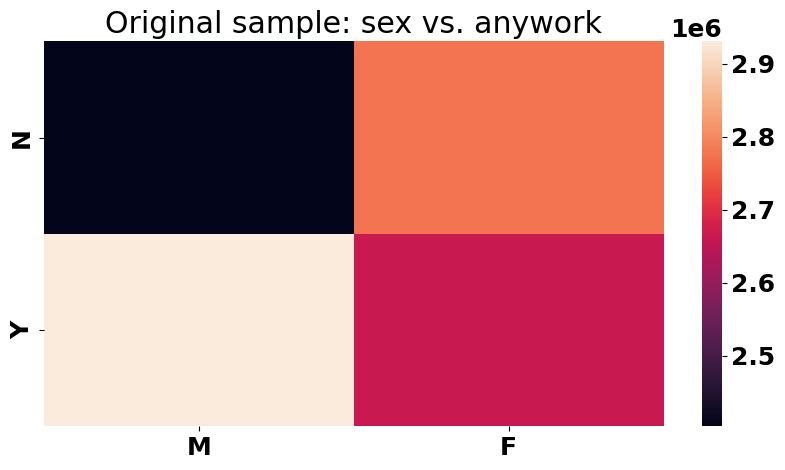

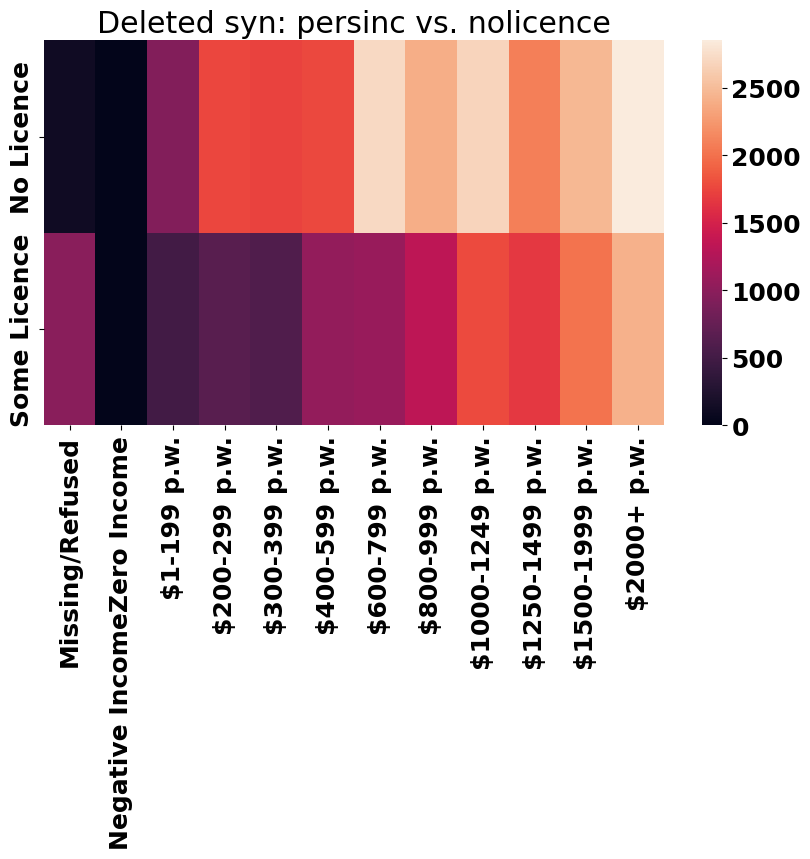

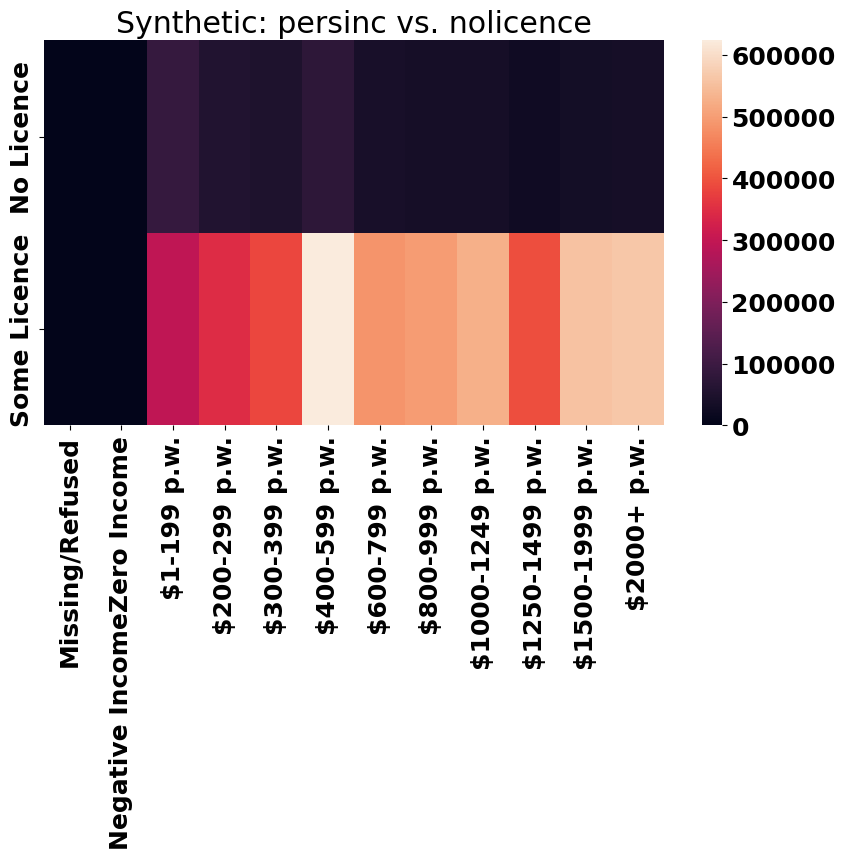

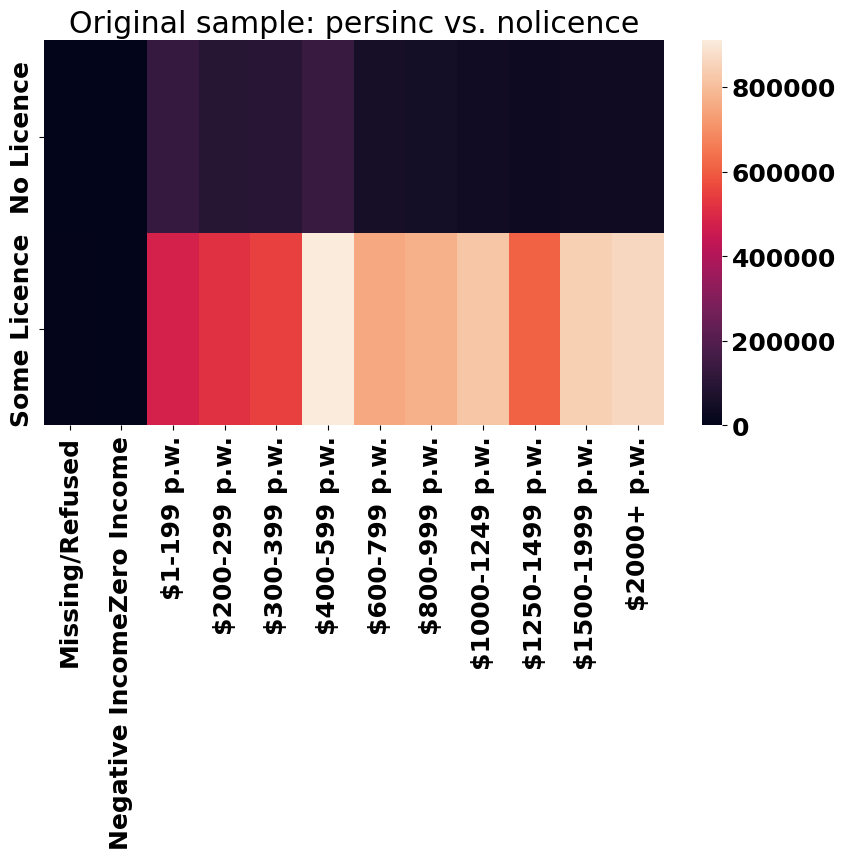

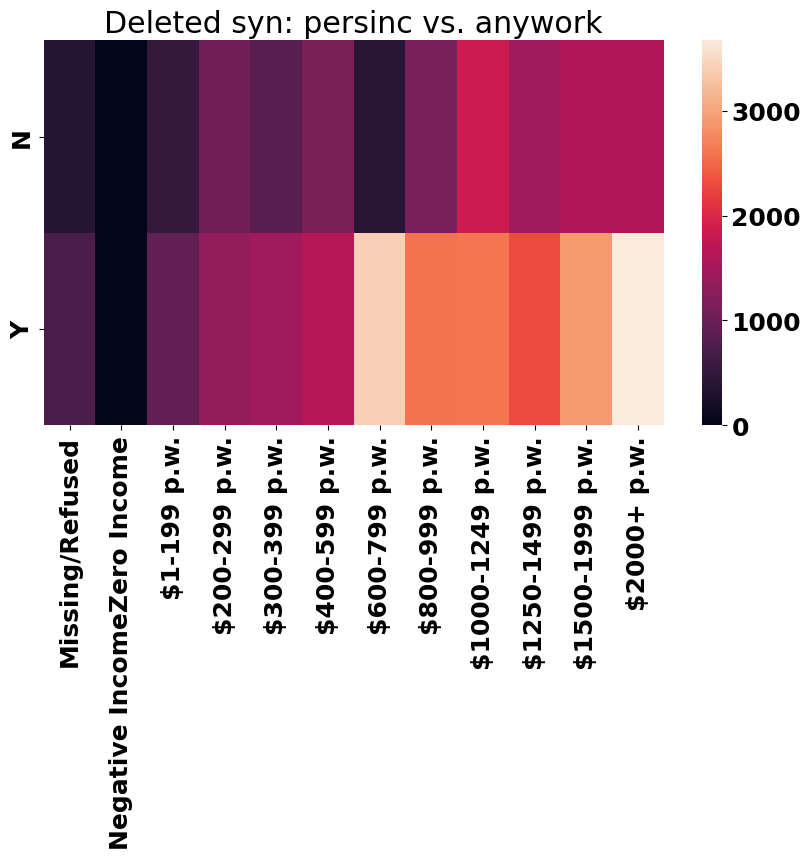

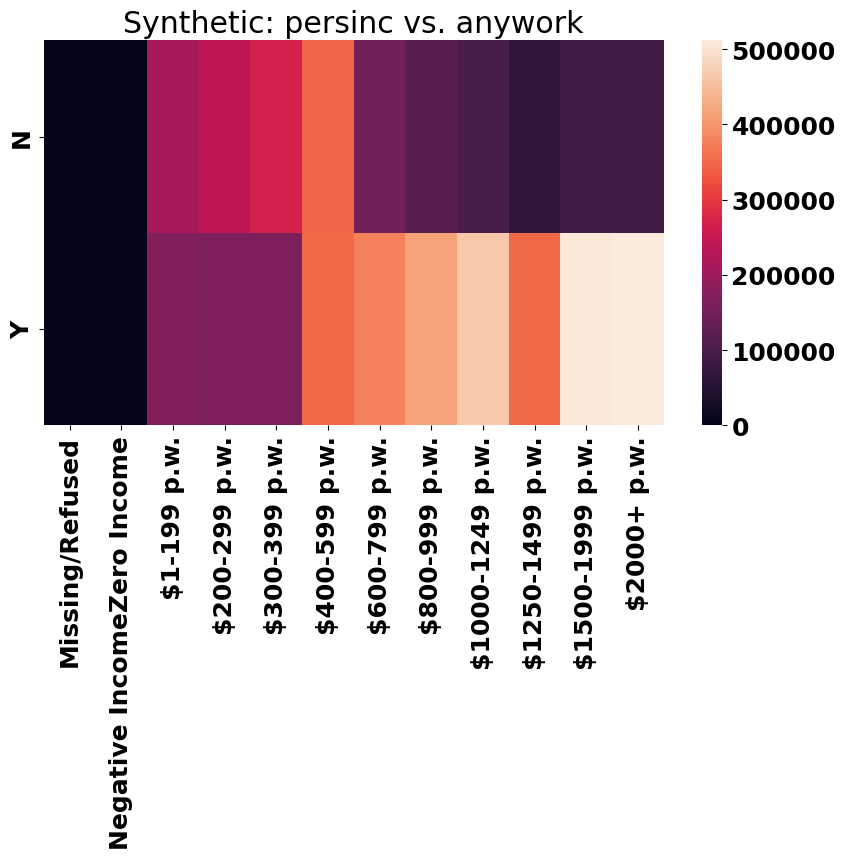

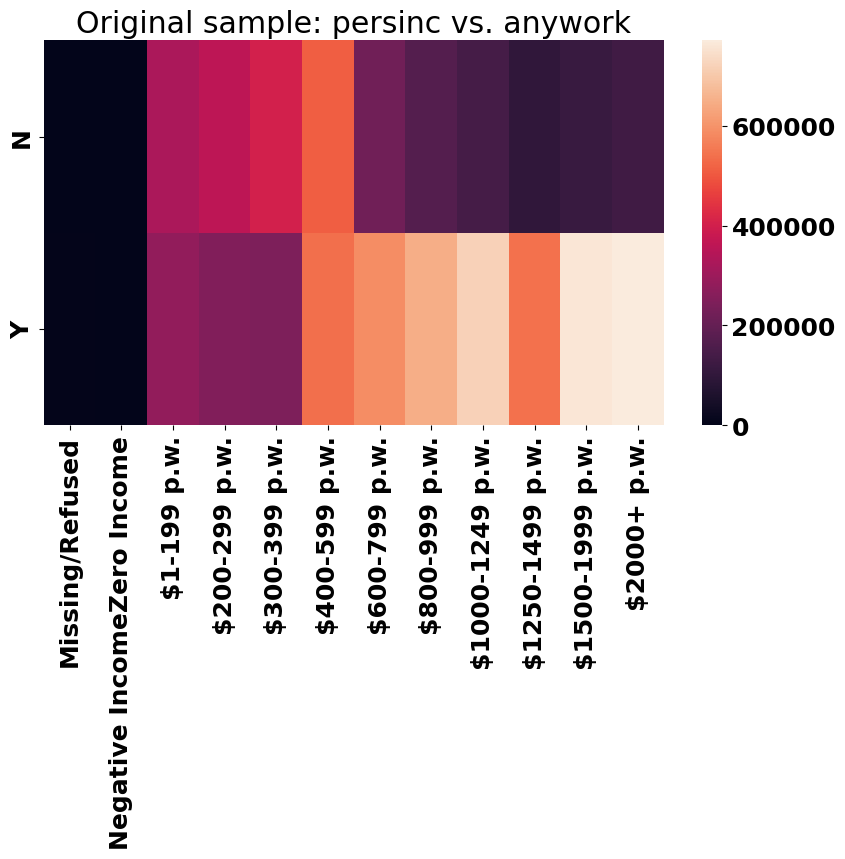

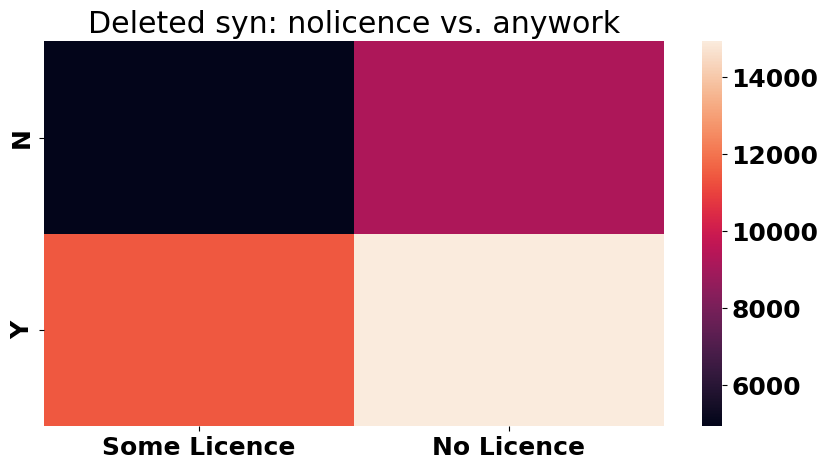

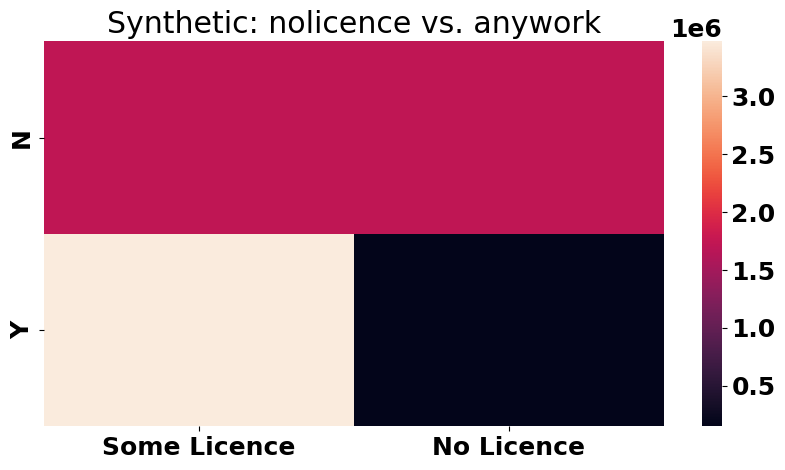

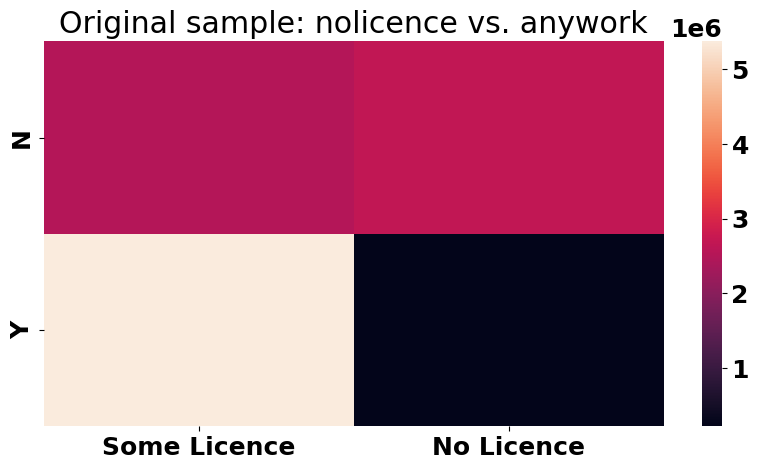

In [85]:
for comb in comb_list_pp:
    get_hm_pair(del_df, comb[0], comb[1], type="pp", name_title="Deleted syn")
    get_hm_pair(syn_pp, comb[0], comb[1], type="pp", name_title="Synthetic")
    get_hm_pair(samples_ori_pp, comb[0], comb[1], type="pp", name_title="Original sample")